In [2]:
from pathlib import Path
import pandas as pd

In [3]:
filepath = "../data/data_dumps/more_questions/more_questions_raw_questions_wiki_sci_2.csv"
file_name = filepath.split("/")[-1].split(".")[0]
print(file_name)
csv = pd.read_csv(filepath, index_col=0)
csv.head()

more_questions_raw_questions_wiki_sci_2


,id,prompt,A,B,C,D,E,answer,cluster number,round
0,1,What is the significance of HD 87883 b?,It is the closest extrasolar planet to Earth.,It is the first planet discovered in the const...,It has the longest orbital period of any known...,It was the first planet detected by the radial...,It has a highly eccentric orbit around its star.,E,0,0
1,2,Which of the following statements about HD 878...,It orbits a K-type main sequence star.,It takes less than a year to complete one orbi...,It was discovered using the transit method.,It has an average distance from its star of 1....,It was detected in 2020.,A,0,0
2,3,What is the definition of a long-period planet?,A planet that takes more than 10 years to comp...,A planet that takes less than a year to comple...,A planet that has an average distance from its...,A planet that has a highly eccentric orbit.,A planet that orbits a K-type main sequence star.,A,0,0
3,4,What is the difference between the closest and...,0.20 AU,1.82 AU,3.82 AU,4.82 AU,6.82 AU,D,0,0
4,5,What is the reason behind the eccentric orbit ...,Gravitational interactions with other planets ...,The tidal forces exerted by the star on the pl...,The presence of a second star in the system.,The planet's initial velocity at the time of f...,Radiation pressure from the star.,A,0,0


In [4]:
# context_prompt = "You are a GOD-like AGI that is a top level expert in all of the scientific fields in the world. " \
#     + f"Your task is to answer to the question below with as much accuracy as possible. " \
#     + f"Think step by step and explain your reasoning before you choose whether this answer is correct. "


# csv['prompt'] = context_prompt + csv['prompt']
# csv.head()


In [5]:
# replace NaN with "None"
csv = csv.fillna("None")

In [6]:
# "Which rows have 'What are the vascular bundles found in' in column 'prompt'?
csv[csv["prompt"].str.contains("What are the vascular bundles found in")]


,id,prompt,A,B,C,D,E,answer,cluster number,round


In [7]:
len(csv)

95327

In [8]:
import matplotlib.pyplot as plt

# remove A5III from answer
csv = csv[csv['answer'] != 'A5III']

# print(csv['answer'].unique())

# Count how many rows have answer != A, B, C, D, E
csv[csv['answer'] != 'A'][csv['answer'] != 'B'][csv['answer'] != 'C'][csv['answer'] != 'D'][csv['answer'] != 'E']


/tmp/ipykernel_1685038/3278626935.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  csv[csv['answer'] != 'A'][csv['answer'] != 'B'][csv['answer'] != 'C'][csv['answer'] != 'D'][csv['answer'] != 'E']
/tmp/ipykernel_1685038/3278626935.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  csv[csv['answer'] != 'A'][csv['answer'] != 'B'][csv['answer'] != 'C'][csv['answer'] != 'D'][csv['answer'] != 'E']
/tmp/ipykernel_1685038/3278626935.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  csv[csv['answer'] != 'A'][csv['answer'] != 'B'][csv['answer'] != 'C'][csv['answer'] != 'D'][csv['answer'] != 'E']
/tmp/ipykernel_1685038/3278626935.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  csv[csv['answer'] != 'A'][csv['answer'] != 'B'][csv['answer'] != 'C'][csv['answer'] != 'D'][csv['answer'] != 'E']


,id,prompt,A,B,C,D,E,answer,cluster number,round
290,291,What is the term used to describe a charge tra...,Ligand-to-metal charge-transfer (LMCT),Metal-to-ligand charge-transfer (MLCT),Intervalence charge transfer (IVCT),Mixed-valence charge transfer,None of the above,MLCT,1,4
291,292,What is the main focus of the optical spectrum...,Transition from ligand σ MO to the empty eg MO,LMCT bands,Transition to the t2g MO and the eg MO,Charge transfer from nonbonding orbitals of th...,"Charge transfer between Fe(III), Fe(II), and c...",Transition from ligand σ MO to the empty eg MO,1,4
292,293,"What is the reason that perrhenate, tungstate,...",They have LMCT bands,They have MLCT bands,They have IVCT bands,The LMCT transitions occur in the UV region,They have nonbonding electrons on the oxo ligands,The LMCT transitions occur in the UV region,1,4
293,294,What is the role of C-T bands in complexes of ...,They result in the reduction of the metal center,They involve transfer of nonbonding electrons ...,They exhibit solvatochromism,They result in a rich chemistry upon irradiation,They are associated with mixed-valence compounds,They result in a rich chemistry upon irradiation,1,4
294,295,What is the main advantage of intervalence cha...,They are lower in energy,They are usually in the visible or near-infrar...,They are spin-allowed and Laporte-allowed,They involve a shift of charge density between...,They establish a preferred length scale for ba...,They are usually in the visible or near-infrar...,1,4
...,...,...,...,...,...,...,...,...,...,...
91958,91959,What is the estimated orbital radius of the ci...,50 AU,100 AU,200 AU,300 AU,400 AU,unknown,968,2
93199,93200,What is the estimated mass of the suspected su...,10 solar masses,1 million solar masses,100 million solar masses,1 billion solar masses,10 billion solar masses,not mentioned,98,2
93200,93201,What kind of galaxy is NGC 514?,Elliptical galaxy,Spiral galaxy,Lenticular galaxy,Irregular galaxy,Dwarf galaxy,not mentioned,98,2
93201,93202,What is the distance of NGC 514 from the Milky...,20 million light-years,50 million light-years,83 million light-years,100 million light-years,150 million light-years,not mentioned,98,2


In [9]:
# remove rows with answer is not either A, B, C, D, E
idx = csv[csv['answer'] != 'A'][csv['answer'] != 'B'][csv['answer'] != 'C'][csv['answer'] != 'D'][csv['answer'] != 'E'].index
csv = csv.drop(idx).reset_index(drop=True)
csv

/tmp/ipykernel_1685038/3364373424.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  idx = csv[csv['answer'] != 'A'][csv['answer'] != 'B'][csv['answer'] != 'C'][csv['answer'] != 'D'][csv['answer'] != 'E'].index
/tmp/ipykernel_1685038/3364373424.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  idx = csv[csv['answer'] != 'A'][csv['answer'] != 'B'][csv['answer'] != 'C'][csv['answer'] != 'D'][csv['answer'] != 'E'].index
/tmp/ipykernel_1685038/3364373424.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  idx = csv[csv['answer'] != 'A'][csv['answer'] != 'B'][csv['answer'] != 'C'][csv['answer'] != 'D'][csv['answer'] != 'E'].index
/tmp/ipykernel_1685038/3364373424.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  idx = csv[csv['answer'] != 'A'][csv['answer'] != 'B'][csv['answer'] != 'C'][csv['answer'] != 'D'][csv['answer'] != 'E'].index


,id,prompt,A,B,C,D,E,answer,cluster number,round
0,1,What is the significance of HD 87883 b?,It is the closest extrasolar planet to Earth.,It is the first planet discovered in the const...,It has the longest orbital period of any known...,It was the first planet detected by the radial...,It has a highly eccentric orbit around its star.,E,0,0
1,2,Which of the following statements about HD 878...,It orbits a K-type main sequence star.,It takes less than a year to complete one orbi...,It was discovered using the transit method.,It has an average distance from its star of 1....,It was detected in 2020.,A,0,0
2,3,What is the definition of a long-period planet?,A planet that takes more than 10 years to comp...,A planet that takes less than a year to comple...,A planet that has an average distance from its...,A planet that has a highly eccentric orbit.,A planet that orbits a K-type main sequence star.,A,0,0
3,4,What is the difference between the closest and...,0.20 AU,1.82 AU,3.82 AU,4.82 AU,6.82 AU,D,0,0
4,5,What is the reason behind the eccentric orbit ...,Gravitational interactions with other planets ...,The tidal forces exerted by the star on the pl...,The presence of a second star in the system.,The planet's initial velocity at the time of f...,Radiation pressure from the star.,A,0,0
...,...,...,...,...,...,...,...,...,...,...
94897,95323,What is the definition of quasiperiodic light ...,Light curves that are irregular and change sli...,Light curves that have magnitudes less than 0.5,Light curves that exhibit periodic variations ...,Light curves that have active chromospheres,Light curves that are classified as K or M stars,A,999,7
94898,95324,What is the purpose of studying BY Draconis va...,To identify nearby K and M stars,To discover new categories of variable stars,To observe flares resulting in additional vari...,To investigate the similarities between BY Dra...,To gain insight into the variability mechanism...,E,999,7
94899,95325,What is the reason behind the similarity betwe...,They both have irregular light curves,They both exhibit variations in luminosity due...,They both have periodic light curves,They both have magnitudes less than 0.5,They both have active chromospheres,B,999,7
94900,95326,What is the term used to describe the variabil...,Quasiperiodic,Chromospheric,Flares,Spectra,Main sequence,A,999,7


In [10]:
import pandas as pd
import numpy as np

def shuffle_answers(df):
    # Shuffle answers
    answers = ['A', 'B', 'C', 'D', 'E']

    for idx, row in df.iterrows():
        current_answer = row['answer']
        
        # Choose a new answer that's different from the current answer
        new_answer = np.random.choice([ans for ans in answers if ans != current_answer])
        
        # Swap the text from the current answer to the new answer and vice-versa
        df.at[idx, current_answer], df.at[idx, new_answer] = df.at[idx, new_answer], df.at[idx, current_answer]
        
        # Update the answer column with the new answer
        df.at[idx, 'answer'] = new_answer


    return df

In [11]:
# Sample DataFrame
data = {
    'id': [1, 2, 3, 4, 5],
    'prompt': ['q1', 'q2', 'q3', 'q4', 'q5'],
    'A': ['text1', 'text2', 'text3', 'text4', 'text5'],
    'B': ['text6', 'text7', 'text8', 'text9', 'text10'],
    'C': ['text11', 'text12', 'text13', 'text14', 'text15'],
    'D': ['text16', 'text17', 'text18', 'text19', 'text20'],
    'E': ['text21', 'text22', 'text23', 'text24', 'text25'],
    'answer': ['A', 'B', 'B', 'A', 'C'],
    'cluster number': [1, 2, 1, 3, 2],
    'round': [1, 1, 2, 2, 3]
}

df = pd.DataFrame(data)
df

,id,prompt,A,B,C,D,E,answer,cluster number,round
0,1,q1,text1,text6,text11,text16,text21,A,1,1
1,2,q2,text2,text7,text12,text17,text22,B,2,1
2,3,q3,text3,text8,text13,text18,text23,B,1,2
3,4,q4,text4,text9,text14,text19,text24,A,3,2
4,5,q5,text5,text10,text15,text20,text25,C,2,3


In [12]:

df = shuffle_answers(df)
df


,id,prompt,A,B,C,D,E,answer,cluster number,round
0,1,q1,text11,text6,text1,text16,text21,C,1,1
1,2,q2,text2,text12,text7,text17,text22,C,2,1
2,3,q3,text3,text13,text8,text18,text23,C,1,2
3,4,q4,text19,text9,text14,text4,text24,D,3,2
4,5,q5,text15,text10,text5,text20,text25,A,2,3


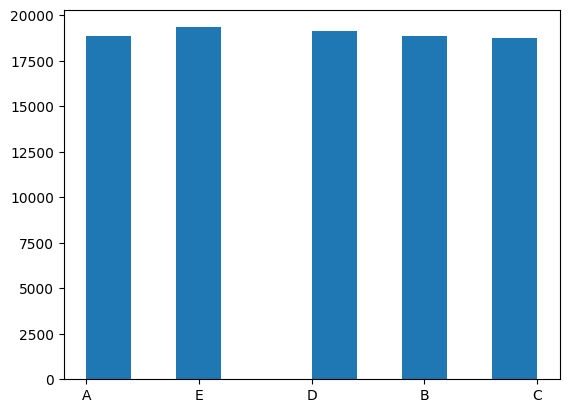

In [13]:
csv = shuffle_answers(csv)
csv = shuffle_answers(csv)
csv = shuffle_answers(csv)

plt.hist(csv['answer'].values);

In [14]:
n = 2000
train_csv = csv.head(-n).reset_index(drop=True)
test_csv = csv.tail(n).reset_index(drop=True)

In [15]:
train_csv

,id,prompt,A,B,C,D,E,answer,cluster number,round
0,1,What is the significance of HD 87883 b?,It has a highly eccentric orbit around its star.,It is the first planet discovered in the const...,It has the longest orbital period of any known...,It was the first planet detected by the radial...,It is the closest extrasolar planet to Earth.,A,0,0
1,2,Which of the following statements about HD 878...,It was detected in 2020.,It takes less than a year to complete one orbi...,It was discovered using the transit method.,It has an average distance from its star of 1....,It orbits a K-type main sequence star.,E,0,0
2,3,What is the definition of a long-period planet?,A planet that has a highly eccentric orbit.,A planet that takes less than a year to comple...,A planet that has an average distance from its...,A planet that takes more than 10 years to comp...,A planet that orbits a K-type main sequence star.,D,0,0
3,4,What is the difference between the closest and...,0.20 AU,4.82 AU,1.82 AU,6.82 AU,3.82 AU,B,0,0
4,5,What is the reason behind the eccentric orbit ...,Gravitational interactions with other planets ...,The presence of a second star in the system.,The tidal forces exerted by the star on the pl...,The planet's initial velocity at the time of f...,Radiation pressure from the star.,A,0,0
...,...,...,...,...,...,...,...,...,...,...
92897,93322,What is the reason that lymphocytic pleocytosi...,Because lymphocytes are normally present in lo...,Because lymphocytes are normally absent in cer...,Because lymphocytes are normally present in hi...,Because lymphocytes are normally present in hi...,Because lymphocytes are normally absent in the...,A,980,4
92898,93323,What is the significance of cyclic neutropenia?,It is a common hematologic disorder that affec...,It is a temporary condition that occurs every ...,It is a rare genetic disorder that causes recu...,It is an autoimmune disease that leads to the ...,It is a form of cancer that primarily affects ...,B,980,5
92899,93324,What is the role of granulocyte colony-stimula...,It decreases the neutrophil count and increase...,It has no effect on cyclic neutropenia.,It treats the underlying genetic mutation caus...,It shortens the cycle length and increases the...,It is used as a preventive measure to avoid in...,D,980,5
92900,93325,What is the cause of both cyclic neutropenia a...,Excessive apoptosis of neutrophils in the blood.,A deficiency of mature neutrophils in the blood.,An autosomal dominant mutation in the ELANE gene.,An abnormality in the bone marrow's neutrophil...,Mislocalization of ELANE protein in the bone m...,C,980,5


In [16]:
test_csv

,id,prompt,A,B,C,D,E,answer,cluster number,round
0,93327,What is the primary treatment for cyclic neutr...,Bone marrow transplantation.,Hematopoietic stem cell transplantation.,Granulocyte-macrophage colony-stimulating fact...,Granulocyte colony-stimulating factor (G-CSF) ...,Antibiotic therapy during the neutropenic period.,D,980,5
1,93328,What is the prognosis for individuals with cyc...,They have a high risk of developing myelodyspl...,They have a higher risk of developing autoimmu...,They have a higher risk of severe infections t...,They have a 50% chance of passing on the condi...,Their survival greatly improves with G-CSF tre...,E,980,5
2,93329,What is the significance of the ELANE gene in ...,It is responsible for regulating the productio...,Mutations in the ELANE gene result in a defici...,It is the most common cause of severe congenit...,The ELANE gene causes mislocalization of neutr...,The ELANE gene interacts with other genes to d...,E,980,5
3,93330,What are the common symptoms of cyclic neutrop...,Inflammation of the tissues surrounding the te...,Bacterial infection of the respiratory and dig...,All of the above.,Abdominal pain and skin inflammation.,"Recurrent fever, malaise, and decreased white ...",C,980,5
4,93331,What is the difference between cyclic neutrope...,Cyclic neutropenia is caused by an autosomal d...,Cyclic neutropenia responds well to G-CSF trea...,Cyclic neutropenia presents with a cyclical pa...,Cyclic neutropenia is more prevalent in adults...,There is no difference between cyclic neutrope...,C,980,5
...,...,...,...,...,...,...,...,...,...,...
1995,95323,What is the definition of quasiperiodic light ...,Light curves that exhibit periodic variations ...,Light curves that are irregular and change sli...,Light curves that have active chromospheres,Light curves that have magnitudes less than 0.5,Light curves that are classified as K or M stars,B,999,7
1996,95324,What is the purpose of studying BY Draconis va...,To identify nearby K and M stars,To observe flares resulting in additional vari...,To discover new categories of variable stars,To investigate the similarities between BY Dra...,To gain insight into the variability mechanism...,E,999,7
1997,95325,What is the reason behind the similarity betwe...,They both have periodic light curves,They both have magnitudes less than 0.5,They both exhibit variations in luminosity due...,They both have irregular light curves,They both have active chromospheres,C,999,7
1998,95326,What is the term used to describe the variabil...,Quasiperiodic,Flares,Chromospheric,Spectra,Main sequence,A,999,7


In [17]:
test_csv.index = list(range(len(test_csv)))
test_csv.index.name = "id"
test_csv.head()

,id,prompt,A,B,C,D,E,answer,cluster number,round
id,,,,,,,,,,
0,93327,What is the primary treatment for cyclic neutr...,Bone marrow transplantation.,Hematopoietic stem cell transplantation.,Granulocyte-macrophage colony-stimulating fact...,Granulocyte colony-stimulating factor (G-CSF) ...,Antibiotic therapy during the neutropenic period.,D,980,5
1,93328,What is the prognosis for individuals with cyc...,They have a high risk of developing myelodyspl...,They have a higher risk of developing autoimmu...,They have a higher risk of severe infections t...,They have a 50% chance of passing on the condi...,Their survival greatly improves with G-CSF tre...,E,980,5
2,93329,What is the significance of the ELANE gene in ...,It is responsible for regulating the productio...,Mutations in the ELANE gene result in a defici...,It is the most common cause of severe congenit...,The ELANE gene causes mislocalization of neutr...,The ELANE gene interacts with other genes to d...,E,980,5
3,93330,What are the common symptoms of cyclic neutrop...,Inflammation of the tissues surrounding the te...,Bacterial infection of the respiratory and dig...,All of the above.,Abdominal pain and skin inflammation.,"Recurrent fever, malaise, and decreased white ...",C,980,5
4,93331,What is the difference between cyclic neutrope...,Cyclic neutropenia is caused by an autosomal d...,Cyclic neutropenia responds well to G-CSF trea...,Cyclic neutropenia presents with a cyclical pa...,Cyclic neutropenia is more prevalent in adults...,There is no difference between cyclic neutrope...,C,980,5


In [18]:
out_dir = Path("../data/raw_questions_wiki_sci_2-splitted/")
out_dir.mkdir(exist_ok=True, parents=True)

train_csv.to_csv(out_dir / f"{file_name}_train.csv")
test_csv.to_csv(out_dir / f"{file_name}_test.csv")

In [19]:
csv_6k = csv.head(6000).reset_index(drop=True)
csv_6k.to_csv(out_dir / "cvs_6k.csv")